# Regression

In [ ]:
# Import numerical and dataframe handling
import pandas as pd

# Import plotting functionality
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn data utilities
from sklearn.model_selection import train_test_split

# Import data preprocessing tools
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Import model scoring
from sklearn import metrics
from sklearn.metrics import r2_score

# Import models
import sklearn.linear_model as lm

## Data

In [ ]:
data = pd.read_csv('../data/parkinsons_updrs.data')

In [ ]:
target = ['motor_UPDRS', 'total_UPDRS']

feat = data.columns.difference(target + ['subject#'])
select_motor = SelectKBest(score_func=f_regression, k=5).fit(data[feat], data[target[0]])
print('Motor:', select_motor.get_feature_names_out())
select_total = SelectKBest(score_func=f_regression, k=5).fit(data[feat], data[target[1]])
print('Total:', select_total.get_feature_names_out())

Motor: ['HNR' 'PPE' 'RPDE' 'Shimmer:APQ11' 'age']
Total: ['HNR' 'PPE' 'RPDE' 'Shimmer:APQ11' 'age']


In [ ]:
important_features1 = ['Shimmer:APQ11', 'HNR', 'RPDE', 'PPE']
important_features2 = ['HNR', 'PPE', 'Shimmer:APQ11', 'age']

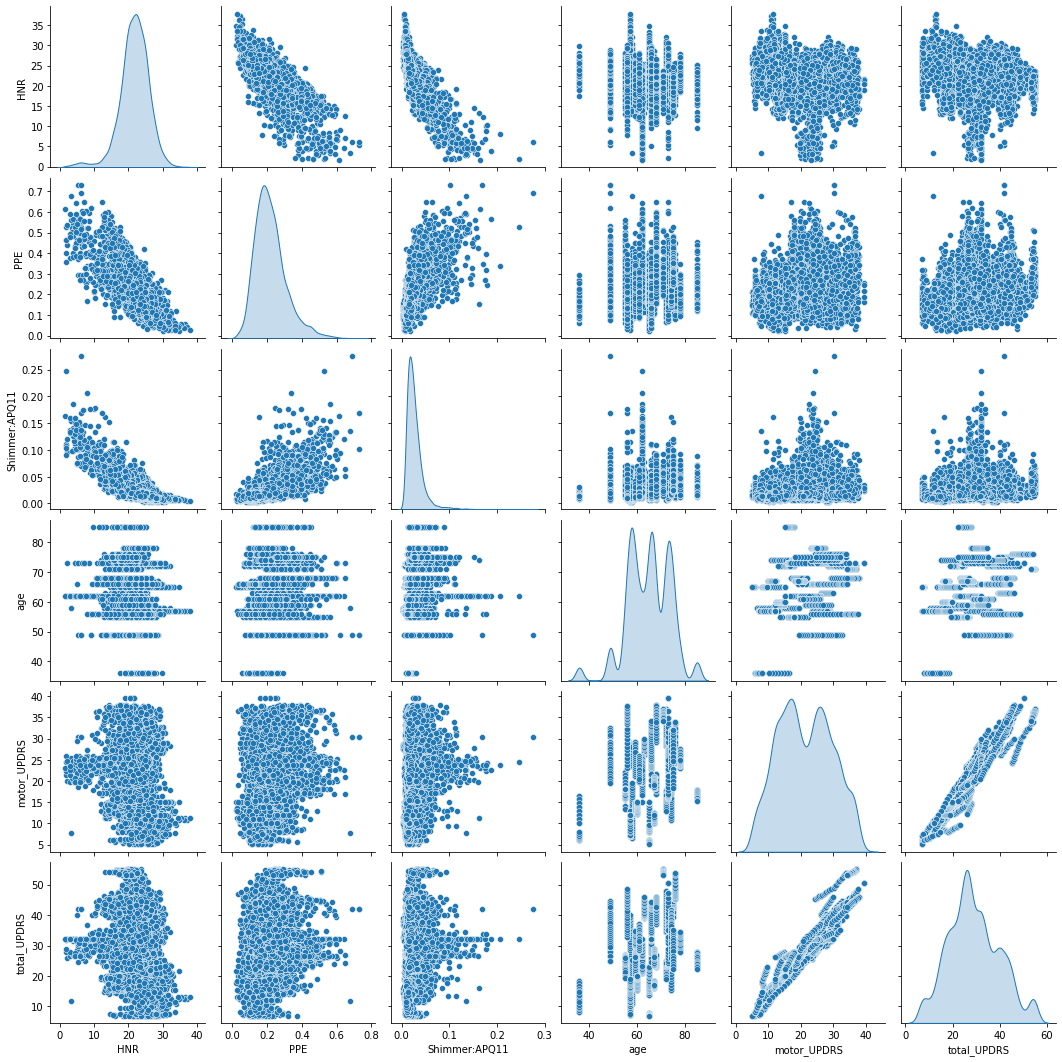

In [ ]:
sns.pairplot(data=data[important_features2 + target], diag_kind='kde')

# Model Training

## Linear

In [ ]:
# Normalize Data
# (normalizing data increased r2 from 0.09 to 0.11)
data_normalized = preprocessing.normalize(data[important_features2])
print(data_normalized)

# Splitting data
x_train, x_test, y_train, y_test = train_test_split(data_normalized, data[target[1]], test_size=0.25, random_state=3)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

[[2.87835303e-01 2.12897036e-03 2.21063897e-04 9.57677533e-01]
 [3.53206899e-01 1.40461560e-03 2.19463066e-04 9.35544155e-01]
 [3.04858536e-01 2.77966645e-03 1.92859698e-04 9.52393569e-01]
 ...
 [3.80066239e-01 2.14665779e-03 2.84613737e-04 9.24956737e-01]
 [3.71678420e-01 2.16170677e-03 1.98912331e-04 9.28359004e-01]
 [3.56273951e-01 2.34911962e-03 2.25169916e-04 9.34378565e-01]]
(4406, 4)
(1469, 4)
(4406,)
(1469,)


0.08847404299811579


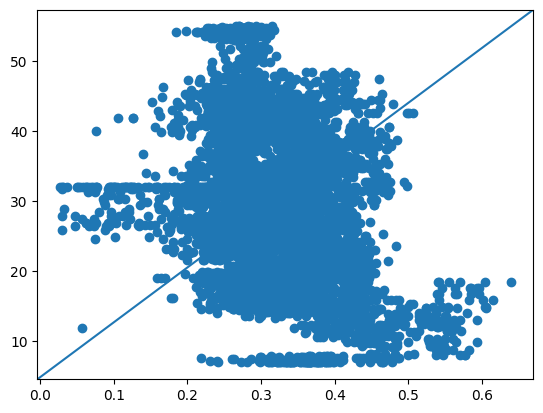

In [ ]:
# Linear Regression
model1 = lm.LinearRegression()
model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)
print(r2_score(y_test, y_pred))

fig, ax = plt.subplots()
plt.scatter(data_normalized[:, 0],data['total_UPDRS'])
ax.plot([0,1],[0,1], transform=ax.transAxes)

Not a very nice linear task
(5th and 6th rows are updrs)
![](https://cdn.discordapp.com/attachments/848967297716584518/1004104149006303312/download_4.png)

## 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a3b4f5ce-96b0-4815-84e4-80dc6a795abb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>